**Assignment-1: Medical Diagnosis using Conditional Probability and Bayes’ Theorem**



In [8]:
import pandas as pd
import random

column1 = list(range(1, 10001))

# Generating random 0s and 1s for the second and third columns
column2 = [random.randint(0, 1) for _ in range(10000)]
column3 = [random.randint(0, 1) for _ in range(10000)]

# Creating a DataFrame for the data
data = {'Patient ID': column1, 'Test Result': column2, 'Actual Disease Status': column3}
df = pd.DataFrame(data)

# Finding the sizee of the dataset
sample_size = len(df)

# Displaying the DataFrame
print(df)

      Patient ID  Test Result  Actual Disease Status
0              1            1                      0
1              2            1                      1
2              3            0                      1
3              4            0                      0
4              5            0                      0
...          ...          ...                    ...
9995        9996            1                      0
9996        9997            1                      1
9997        9998            0                      1
9998        9999            0                      0
9999       10000            0                      1

[10000 rows x 3 columns]


**Question 1: Calculate the probability of having the disease**

In [9]:
actual_disease_count = df['Actual Disease Status'].sum()

p_having_disease = actual_disease_count/sample_size

# Displaying the count
print(f'Probabilty of having a disease is {p_having_disease}')

Probabilty of having a disease is 0.497


**Question 2: Calculate the probability of getting a positive test result**

In [10]:
postive_test_count = df['Test Result'].sum()

p_positive_test_count = postive_test_count/sample_size

# Displaying the count
print(f'Probabilty of getting a positive test result is {p_positive_test_count}')

Probabilty of getting a positive test result is 0.4911


**Question 3: Calculate the probability of getting a positive test result given that a patient has the
disease**

In [11]:
# Counting the number of rows where actual disease is 1
count_actual_disease = (df['Actual Disease Status'] == 1).sum()

# Counting the number of rows where there is a positive test result and patient has disease
count_actual_disease_and_positive_test = ((df['Actual Disease Status'] == 1) & (df['Test Result'] == 1)).sum()

# Required conditional probability
p_positive_given_disease = count_actual_disease_and_positive_test/count_actual_disease

# Displaying the count
print(f'Probability of getting a positive test result given that a patient has the disease {p_positive_given_disease}')

Probability of getting a positive test result given that a patient has the disease 0.4921529175050302


**Question 4: Calculate the probability of having the disease given a positive test result using Bayes’
theorem**

In [12]:
P_Disease = df['Actual Disease Status'].mean()

# Calculate the probability of getting a positive test result given that disease
P_Positive_Test_given_Disease = (df['Test Result'] & df['Actual Disease Status']).mean() / P_Disease

# Calculate the probability of getting a positive test result given that no disease
P_Positive_Test_given_No_Disease = (df['Test Result'] & (1 - df['Actual Disease Status'])).mean() / (1 - P_Disease)

# Applying Bayes' theorem
P_Disease_given_Positive_Test = (P_Positive_Test_given_Disease * P_Disease) / ((P_Positive_Test_given_Disease * P_Disease) + (P_Positive_Test_given_No_Disease * (1 - P_Disease)))

print("Probability of having the disease given a positive test result:", P_Disease_given_Positive_Test)

Probability of having the disease given a positive test result: 0.4980655670942782


**Question 5:  Calculate confusion matrix, accuracy, sensitivity and specificity**


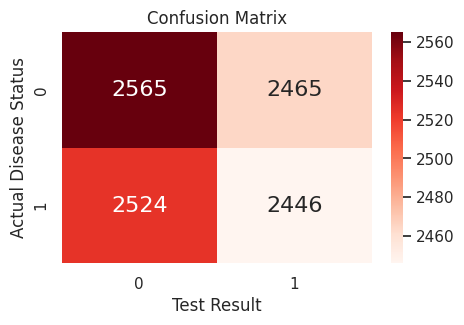




Accuracy: 0.5011
Sensitivity: 0.4921529175050302
Specificity: 0.5099403578528827


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Defining the true labels and predicted labels for confusion matrix
true_labels = df['Actual Disease Status']  # True labels (actual disease)
predicted_labels = df['Test Result']  # Predicted labels (test results)

# Calculating the confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)

print("\n\n")
sns.set(font_scale=1)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 16})
plt.xlabel("Test Result")
plt.ylabel("Actual Disease Status")
plt.title("Confusion Matrix")
plt.show()

# Extracting values from the confusion matrix
tn, fp, fn, tp = conf_mat.ravel()

# Calculating accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculating sensitivity
sensitivity = tp / (tp + fn)

# Calculating specificity
specificity = tn / (tn + fp)


print("\n\n")
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

**Question 6: Generate classification reports including precision, recall and F1-score**

In [14]:
from sklearn.metrics import classification_report

# Generating classification Reports
report = classification_report(true_labels, predicted_labels)

# Printing the classification report
print(report)

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\n\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      5030
           1       0.50      0.49      0.50      4970

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



Precision: 0.4980655670942781
Recall: 0.4921529175050302
F1 Score: 0.49509158992004865


**Question 7: Analyze the variation in result if dataset size increases or decreases**

**Answer:**



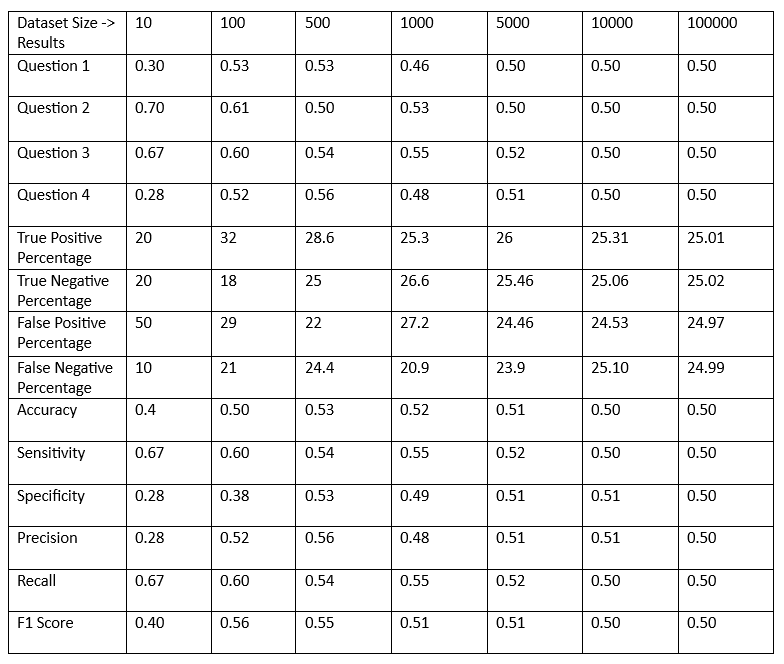

As observed from the table above, as the size of the dataset increases, the values of accuracy, sensitivity, specificity, precision, recall and F1 score tend to become constant at 0.50.

This may be attributed to the fact that the noise or randomness in the dataset is reduced greatly as when the size of the dataset increases.

Conversely, when the size of the dataset decreases, the values of accuracy, sensitivity, specificity, precision, recall and F1 score tend to fluctuate up and down because of the randomness of the values in the data.

Thus, it can be concluded that it depends on the type of values that are randomly generated by the rand function, which influences the output values.